# Проект принятие решений в бизнесе
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

Файл `/datasets/hypothesis.csv`  
`Hypothesis` — краткое описание гипотезы  
`Reach` — охват пользователей по 10-балльной шкале  
`Impact` — влияние на пользователей по 10-балльной шкале  
`Confidence` — уверенность в гипотезе по 10-балльной шкале  
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл `/datasets/orders.csv`  
`transactionId` — идентификатор заказа  
`visitorId` — идентификатор пользователя, совершившего заказ  
`date` — дата, когда был совершён заказ  
`revenue` — выручка заказа  
`group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`  
`date` — дата  
`group` — группа A/B-теста  
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Часть 1. Приоритизация гипотез

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
pd.options.display.max_colwidth = 300

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Примение фреймворка ICE для приоритизации гипотез.

In [5]:
hypothesis['ice_score'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [6]:
hypothesis['ice_score'].sort_values(ascending = False)

8    16.200000
0    13.333333
7    11.200000
6     8.000000
2     7.000000
1     2.000000
5     1.333333
3     1.125000
4     1.000000
Name: ice_score, dtype: float64

### Применение фреймворка RICE для приоритизации гипотез.

In [7]:
hypothesis['rice_score'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [8]:
hypothesis['rice_score'].sort_values(ascending = False)

7    112.0
2     56.0
6     40.0
0     40.0
8     16.2
3      9.0
5      4.0
1      4.0
4      3.0
Name: rice_score, dtype: float64

К топ 3 гипотез фреймфорк ICE относит 8,0,7 гипотезы, RICE учитывает охват и топ 3 гипотез 7, 2, 6.

Учет параметра Reach с помощью фреймворка RICE поменял приоритетность гипотез, полученных с помощью ICE. 
Приоритетность гипотезы о скидке в день рождения справедливо понизилась из-за низкого охвата. Приоритетность гипотезы о новых каналах привлечения трафика понизилась, но гипотеза осталась в топе. Гипотеза 7 о сборе баз клиентов для рассылок вышла на первое место из-за большого охвата. В топ вышли гипозы 2 и 8 о блоках рекомендаций и баннерной рекламе. при важности охвата большего числа пользователей следует тестировать гипотезы топа, полученные фреймворком RICE.


## Часть 2. Анализ A/B-теста

In [9]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [15]:
print('Число заказов в группе А:', len(orders.query("group=='A'")))
print('Число заказов в группе B:', len(orders.query("group=='B'")))

Число заказов в группе А: 557
Число заказов в группе B: 640


Заказов в группе B больше, проверим, есть ли в двух группах пересечение пользователей по составу

In [16]:
orders.query("group=='B'")['visitorId'].isin(orders.query("group=='A'")['visitorId']).sum()

92

соберем пользователей, пересекающихся в двух группах и удалим их из orders

In [17]:
AB = orders.loc[orders['visitorId'].isin(orders.query("group=='A'")['visitorId']) & orders['visitorId'].isin(orders.query("group=='B'")['visitorId']), 'visitorId']

In [18]:
orders = orders.loc[~orders['visitorId'].isin(AB)]

Мы загрузили данные из таблиц и записали в датафреймы. Исследовали данные и привели колонки с датой к типо date. Число заказов  в группе оказалось больше, чам в группе A, мы проверили пересечение групп по составу и нашли 92 пользователя группы B в A, собрав пересекающихся пользователей мы сформировали orders с отсутствием пересечения поьзователей.


#### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [19]:
# получаем агрегированные кумулятивные по дням данные о заказах 
orders_group = (orders
                 .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                        orders['group'] ==  x['group'])]
                .agg({'date':'max', 'group':'max', 'revenue':'sum',
                      'transactionId':'nunique'}), axis=1) 
                .sort_values(by=['date','group']))
orders_group.rename(columns={'transactionId':'orders'}, inplace=True)
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_group = (visitors
                 .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                          visitors['group'] ==  x['group'])]
                .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1) 
                .sort_values(by=['date','group']))
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
data = orders_group.merge(visitors_group, on = ['group','date'])

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


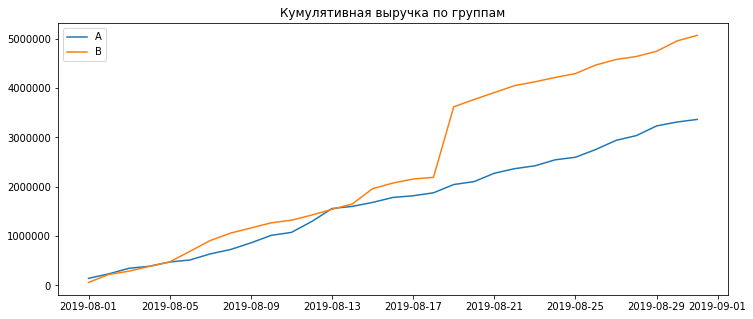

In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
orders_group_a = orders_group[orders_group['group']=='A']
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
orders_group_b = orders_group[orders_group['group']=='B']
plt.figure(figsize=(12, 5))
# Строим график выручки группы А
plt.plot(
    orders_group_a['date'],
    orders_group_a['revenue'],
    label='A') 
# Строим график выручки группы B
plt.plot(
    orders_group_b['date'],
    orders_group_b['revenue'],
    label='B')
plt.title('Кумулятивная выручка по группам')
plt.legend()
plt.show()

Наблюдаем резкий скачок выручки после 17.08 в группе B

#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

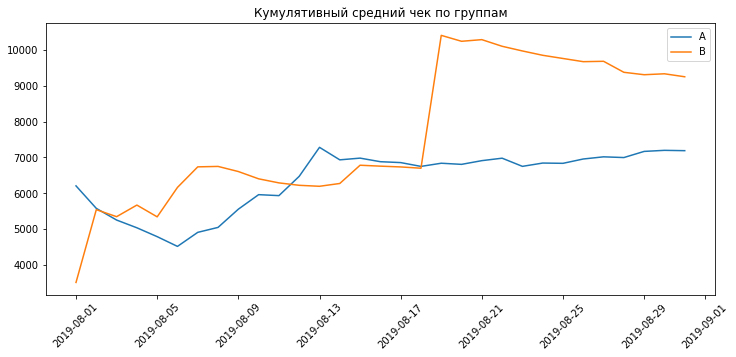

In [21]:
plt.figure(figsize=(12, 5))
plt.plot(orders_group_a['date'], orders_group_a['revenue'] / orders_group_a['orders'], label='A')
plt.plot(orders_group_b['date'], orders_group_b['revenue'] / orders_group_b['orders'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивный средний чек по группам')
plt.legend();

Видим растущий стредний чек и небольше снижение с 13.08 в группе A, дорогую покупку в группе B после 17.08

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

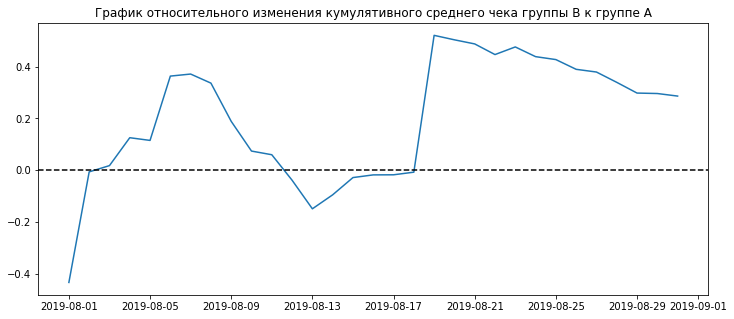

In [22]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = orders_group_a.merge(orders_group_b, left_on='date',
                                               right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

Дорогие покупки происходили в начале и конце исслежуемого периода

#### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

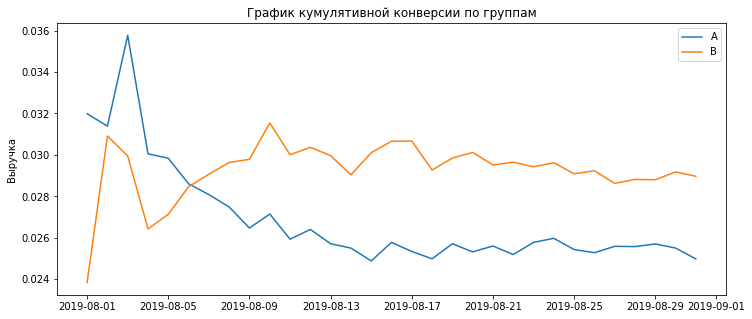

In [23]:
# считаем кумулятивную конверсию
data['conversion'] = data['orders']/data['visitors']

# отделяем данные по группе A
cumulativeDataA = data[data['group']=='A']

# отделяем данные по группе B
cumulativeDataB = data[data['group']=='B']

# строим графики
plt.figure(figsize=(12, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel("Выручка")
plt.legend()
 

Конверсия группы A изначально была выше, но снижалась, в то время как конверсия B росла и на промежутке времени стабильно превышет конверсию A на 0.004

<div class="alert alert-success">

**Комментарий ревьюера**
    
Комментарии по графику конверсии верные!
    
</div>

#### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

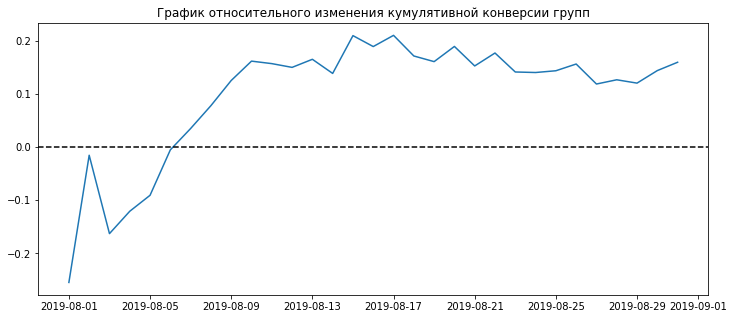

In [24]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 5))
plt.title('График относительного изменения кумулятивной конверсии групп')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')

Конверсия B значительно лучше, чем у групппы A

#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [25]:
orders_by_users = (orders.groupby('visitorId')['revenue'].count()
                   .reset_index()
                   .rename(columns={'revenue':'orders'}))

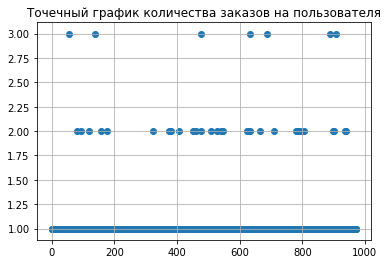

In [26]:
x_values = pd.Series(range(0,orders_by_users['orders'].count()))
plt.scatter(x_values, orders_by_users['orders'])
plt.grid()
plt.title('Точечный график количества заказов на пользователя')
plt.show()

В основном пользователи совершают 1 покупку, больше 3 покупок случается редко.

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.


In [27]:
percentile = np.percentile(orders_by_users['orders'], [95,99])
percentile_99 = percentile[1]
print('95 перцентиль:', percentile[0])
print('99 перцентиль:', percentile[1])

95 перцентиль: 1.0
99 перцентиль: 2.0


In [28]:
orders_by_users_clean = orders_by_users.query('orders <= @percentile_99')

Удалим значения выше 95 перцентиля, пользователей, совершивших больше 2 заказов

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.


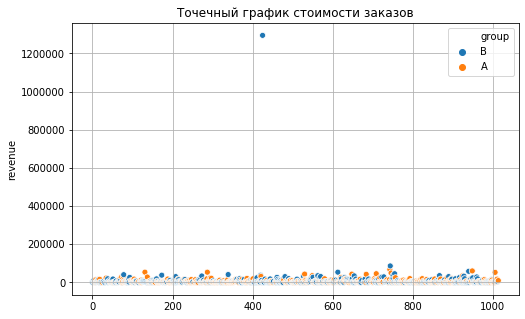

In [29]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data = orders, x=pd.Series(range(0,orders['revenue'].count())),
                y="revenue", hue="group")
plt.title('Точечный график стоимости заказов')
plt.grid()

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.


In [30]:
per = np.percentile(orders['revenue'], [95,99])
per_99 = per[1]
print('95 перцентиль:', per[0])
print('99 перцентиль:', per[1])

95 перцентиль: 26785.0
99 перцентиль: 53904.0


Значения выше 99 персениля будем считать аномальными, удалим такие значения

In [31]:
orders_clean = orders.query('revenue < @per_99')

In [32]:
orders_clean = orders_clean.loc[orders_clean['visitorId'].isin(orders_by_users_clean['visitorId'])]

#### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.


Гипотеза H0 - конверсия групп A и B равны  
Альтернативная гипотеза H1 - конверсии групп не равны  
Уровень значимости 0.05

In [33]:
orders_by_usersA = orders[orders['group']=='A'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersA.columns=['visitorsId','orders']
orders_by_usersB = orders[orders['group']=='B'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersB.columns=['visitorsId','orders']

In [34]:
sampleA = pd.concat([orders_by_usersA['orders'],
                     pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() -
                                                  len(orders_by_usersA['orders'])), name='orders')
])
sampleB = pd.concat([orders_by_usersB['orders'],
                     pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() -
                                                  len(orders_by_usersB['orders'])), name='orders')])

In [35]:
print('p_value: {:.5f}'.format(st.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided' )[1]))
print('Средняя конверсия группы А: {:.1%}'.format(sampleA.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sampleB.mean()))
print('Относительный прирост конверсии B:{:.3}'.format(sampleB.mean()/sampleA.mean()-1))

p_value: 0.01102
Средняя конверсия группы А: 2.5%
Средняя конверсия группы B: 2.9%
Относительный прирост конверсии B:0.16


Так как p значение меньше уровня значимости, то гипотеза H0 отвергается, конверсии групп не равны.
    

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.


H0 - средний чек групп A и B равны  
H1 - средний чек групп не равен  
Уровень значимости 0.05

In [36]:
print('p_value: {:.5f}'.format(
    st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'],
                    alternative = 'two-sided' )[1]
))
print('Средний чек группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()))
print('Относительные различия в среднем чеке: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p_value: 0.82949
Средний чек группы А: 7189.44
Средний чек группы B: 9249.95
Относительные различия в среднем чеке: 0.287


Так как p значение больше уровня значимости, гипотеза не отвергается средние чеки групп равны

#### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.


Гипотеза H0 - конверсия групп A и B равны  
Альтернативная гипотеза H1 - конверсии групп не равны  
Уровень значимости 0.05  

In [37]:
orders_by_usersA = orders_clean[orders_clean['group']=='A'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersA.columns=['visitorsId','orders']

orders_by_usersB = orders_clean[orders_clean['group']=='B'].groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_usersB.columns=['visitorsId','orders']

In [38]:
sampleA = pd.concat([orders_by_usersA['orders'], pd.Series(0,
                                                           index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() -
                                                                              len(orders_by_usersA['orders'])), name='orders')
])
sampleB = pd.concat([orders_by_usersB['orders'], pd.Series(0,
                                                           index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() -
                                                                              len(orders_by_usersB['orders'])), name='orders')])

In [39]:
print('p_value: {:.5f}'.format(st.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided' )[1]))
print('Средняя конверсия группы А: {:.1%}'.format(sampleA.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sampleB.mean()))
print('Относительный прирост конверсии B:{:.3}'.format(sampleB.mean()/sampleA.mean()-1))

p_value: 0.00621
Средняя конверсия группы А: 2.4%
Средняя конверсия группы B: 2.8%
Относительный прирост конверсии B:0.193


Значение p меньше уровня значимости, гипотеза H0 отвергается, принимается альтернативная о разнице конверсий групп

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.


H0 - средний чек групп A и B равны  
H1 - средний чек групп не равен  
Уровень значимости 0.05

In [40]:
print('p_value: {:.5f}'.format(
    st.mannwhitneyu(orders_clean[orders_clean['group']=='A']['revenue'],
                    orders_clean[orders_clean['group']=='B']['revenue'],
                   alternative = 'two-sided' )[1]
))
print('Средний чек группы А: {:.2f}'.format(orders_clean[orders_clean['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders_clean[orders_clean['group']=='B']['revenue'].mean()))
print('Относительные различия в среднем чеке: {0:.3f}'.format(orders_clean[orders_clean['group']=='B']['revenue'].mean()/orders_clean[orders_clean['group']=='A']['revenue'].mean()-1)) 

p_value: 0.84171
Средний чек группы А: 6274.39
Средний чек группы B: 6188.58
Относительные различия в среднем чеке: -0.014


На очищенных данных получили результаты, статистически значения среднего чека групп неразличимы

#### Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Принимаем решение остановить тест и зафиксировать победу группы B, после очистки от аномалий мы выявили статистические различия в конверсиях групп, группа B лидирует.

### Вывод

Мы приоретизировали предложенные гипотезы с помощью фреймворков ICE и RICE.  
Учет параметра Reach с помощью фреймворка RICE поменял приоритетность гипотез, полученных с помощью ICE. 
Приоритетность гипотезы о скидке в день рождения справедливо понизилась из-за низкого охвата. Приоритетность гипотезы о новых каналах привлечения трафика понизилась, но гипотеза осталась в топе. Гипотеза 7 о сборе баз клиентов для рассылок вышла на первое место из-за большого охвата. В топ вышли гипозы 2 и 8 о блоках рекомендаций и баннерной рекламе. при важности охвата большего числа пользователей следует тестировать гипотезы топа, полученные фреймворком RICE.

Мы загрузили данные из таблиц и записали в датафреймы. Исследовали данные и привели колонки с датой к типо date. Число заказов  в группе оказалось больше, чам в группе A, мы проверили пересечение групп по составу и нашли 92 пользователя группы B в A, собрав пересекающихся пользователей мы сформировали orders с отсутствием пересечения поьзователей.

Постоили график кумулятивной выручки по группам и увиднли скчок в группе B после 17.08. На резкие скачки выручки могут повлиять, как аномально большие заказы, так и большое количество обычных заказов. Постороили график кумуятивного среднего чека. Видим растущий стредний чек и небольше снижение с 13.08 в группе A, дорогую покупку в группе B после 17.08. По графику относительного изменения среднего чека сделали вывод, дорогие покупки происходили в начале и конце исследуемого периода. По графику кумулятивной конверсии видим, конверсия группы A изначально была выше, но снижалась, в то время как конверсия B росла и на промежутке времени стабильно превышет конверсию A на 0.004. Конверсия B значительно лучше, чем у групппы A.

По графику количества заказов на пользователя, в основном пользователи совершают 1 покупку, больше 3 покупок случается редко. Выводы подтверждает рассчет персентилей, выбираем границу определения аномальных пользователей 99 персентиль - 2 заказа. Исследовали стоимость заказов, значения выше 99 персениля - 53904 будем считать аномальными.

Мы собрали очищенный от аномальных значений датасет. По сырым данным посчитали статистическую значимость различий конверсий и среднего чека групп, конверсии групп не равны. Средние чеки групп равны, видна парадоксальность результата: разница большая, но статистически не значима. Это обусловлено аномалиями, к которым критерий Манна-Уитни не чувствителен. Провели те же тесты на очищенных данных и подтвердили вывод о различии конверсии групп, по очищенным данным относительная разница в среднем чеке очевидно мала, что подтверждает тест, статистически значения среднего чека групп неразличимы.

Принимаем решение остановить тест и зафиксировать победу группы B, после очистки от аномалий мы выявили статистические различия в конверсиях групп, группа B лидирует.